### Objetivos da análise exploratória
Para a minha análise exploratória, foquei em investigar aspectos relacionados às categorias de produtos disponíveis no e-commerce. Utilizei os conjuntos de dados "olist_order_items", "olist_orders" e "olist_products" para extrair informações relevantes e responder às seguintes questões:

1.Quais categorias de produtos tiveram maior volume de vendas?
2.Qual é a média de fotos associadas a cada categoria de produto?
3.Qual categoria de produtos gerou o maior faturamento total?

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

Tratamento dos dados

In [54]:
# Limpeza do dataset "order_items", com retirada de colunas não necessárias para a análise.
df_order_items = pd.read_csv('dados_brutos/olist_order_items_dataset.csv')
df_order_items = df_order_items.drop(['order_item_id', 'seller_id', 'shipping_limit_date', 'freight_value'], axis=1)
df_order_items.info()
df_order_items

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   order_id    112650 non-null  object 
 1   product_id  112650 non-null  object 
 2   price       112650 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.6+ MB


,order_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90
...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99


In [3]:
#Limpeza do dataset "products", com retirada de colunas não necessárias para a análise.
df_products = pd.read_csv('dados_brutos/olist_products_dataset.csv')
df_products = df_products.drop(['product_name_lenght', 'product_description_lenght', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1)
df_products.info()
df_products

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_photos_qty     32341 non-null  float64
dtypes: float64(1), object(2)
memory usage: 772.4+ KB


,product_id,product_category_name,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0
...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,2.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,1.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0


In [56]:
#Limpeza do dataset "orders", com retirada de colunas não necessárias para a análise.
df_orders = pd.read_csv('dados_brutos/olist_orders_dataset.csv')
df_orders = df_orders.drop(['customer_id', 'order_approved_at', 'order_delivered_carrier_date', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1)
df_orders.info()
df_orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      99441 non-null  object
 1   order_status  99441 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


,order_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered
...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,delivered
99437,63943bddc261676b46f01ca7ac2f7bd8,delivered
99438,83c1379a015df1e13d02aae0204711ab,delivered
99439,11c177c8e97725db2631073c19f07b62,delivered


Junção dos datasets

In [57]:
df_olist = pd.merge(df_products, df_order_items, on='product_id', how='inner')
df_olist

,product_id,product_category_name,product_photos_qty,order_id,price
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,e17e4f88e31525f7deef66779844ddce,10.91
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,5236307716393b7114b53ee991f36956,248.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,01f66e58769f84129811d43eefd187fb,79.80
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,143d00a4f2dde4e0364ee1821577adb3,112.30
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,86cafb8794cb99a9b1b77fc8e48fbbbb,37.90
...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,59e88b7d3675e89aceaf86f372d3bc9a,29.90
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,6e4465d771f02e4fe335225de3c6c043,29.90
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,6e4465d771f02e4fe335225de3c6c043,29.90
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,6e4465d771f02e4fe335225de3c6c043,29.90


In [58]:
df_olist = pd.merge(df_olist, df_orders, on='order_id', how='inner')
df_olist

,product_id,product_category_name,product_photos_qty,order_id,price,order_status
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,e17e4f88e31525f7deef66779844ddce,10.91,delivered
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,5236307716393b7114b53ee991f36956,248.00,delivered
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,01f66e58769f84129811d43eefd187fb,79.80,delivered
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,143d00a4f2dde4e0364ee1821577adb3,112.30,delivered
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,86cafb8794cb99a9b1b77fc8e48fbbbb,37.90,delivered
...,...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,59e88b7d3675e89aceaf86f372d3bc9a,29.90,delivered
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,6e4465d771f02e4fe335225de3c6c043,29.90,delivered
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,6e4465d771f02e4fe335225de3c6c043,29.90,delivered
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,6e4465d771f02e4fe335225de3c6c043,29.90,delivered


In [59]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   product_id             112650 non-null  object 
 1   product_category_name  111047 non-null  object 
 2   product_photos_qty     111047 non-null  float64
 3   order_id               112650 non-null  object 
 4   price                  112650 non-null  float64
 5   order_status           112650 non-null  object 
dtypes: float64(2), object(4)
memory usage: 5.2+ MB


In [60]:
df_olist = df_olist.dropna()

In [61]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111047 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   product_id             111047 non-null  object 
 1   product_category_name  111047 non-null  object 
 2   product_photos_qty     111047 non-null  float64
 3   order_id               111047 non-null  object 
 4   price                  111047 non-null  float64
 5   order_status           111047 non-null  object 
dtypes: float64(2), object(4)
memory usage: 5.9+ MB


In [62]:
df_olist = df_olist.loc[df_olist['order_status'] == 'delivered']
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108660 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   product_id             108660 non-null  object 
 1   product_category_name  108660 non-null  object 
 2   product_photos_qty     108660 non-null  float64
 3   order_id               108660 non-null  object 
 4   price                  108660 non-null  float64
 5   order_status           108660 non-null  object 
dtypes: float64(2), object(4)
memory usage: 5.8+ MB


In [63]:
df_olist = df_olist.reset_index(drop=True)

In [64]:
df_olist.to_csv('df_final_s14_olist_angela.csv', index=False)

Analisando os dados

1. Quais categorias de produtos foram as mais vendidas? 

In [66]:
df_olist['product_category_name'].describe()

count              108660
unique                 73
top       cama_mesa_banho
freq                10953
Name: product_category_name, dtype: object

In [67]:
conjuntos_categoricos = {
    'beleza_saude': [
        'perfumaria', 'beleza_saude'
    ],
    'esportes_lazer': [
        'esporte_lazer', 'fashion_esporte'
    ],
    'infantil': [
        'bebes', 'brinquedos', 'fashion_roupa_infanto_juvenil', 'fraldas_higiene'
    ],
    'casa': [
        'utilidades_domesticas', 'moveis_decoracao', 'cama_mesa_banho',
        'casa_construcao', 'moveis_cozinha_area_de_servico_jantar_e_jardim',
        'moveis_sala', 'moveis_quarto', 'moveis_colchao_e_estofado',
        'moveis_conforto', 'moveis_bem_estar', 'casa_conforto', 'moveis_escritorio',  
    ],
    'informatica_e_eletronicos': [
        'instrumentos_musicais', 'cool_stuff', 'eletronicos',
        'informatica_acessorios', 'pcs', 'telefonia_fixa',
        'consoles_games', 'tablets_impressao_imagem',
        'portateis_casa_forno_e_cafe', 'pc_gamer',
    ],
    'moda': [
        'fashion_calcados', 'fashion_bolsas_e_acessorios',
        'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
        'fashion_roupa_feminina', 'fashion_esporte'
    ],
    'livros_e_cds': [
        'livros_interesse_geral', 'livros_tecnicos',
        'livros_importados', 'cds_dvds_musicais'
    ],
    'ferramentas_e_construcao': [
        'construcao_ferramentas_seguranca', 'construcao_ferramentas_construcao',
        'construcao_ferramentas_ferramentas', 'construcao_ferramentas_jardim',
        'construcao_ferramentas_iluminacao'
    ],
    'alimentos_e_bebidas': [
        'bebidas', 'alimentos_bebidas', 'alimentos'
    ],
    'pets': [
        'pet_shop'
    ],
    'eventos_e_presentes': [
        'relogios_presentes', 'artigos_de_festas', 'artigos_de_natal'
    ],
    'entretenimento': [
        'musica', 'dvds_blu_ray', 'artes_e_artesanato', 'cine_foto', 'market_place',
        'la_cuisine',  'seguros_e_servicos', 'cds_dvds_musicais'
    ],
    'telefonia_e_comunicacao': [
        'telefonia', 'telefonia_fixa'
    ],
    'eletrodomesticos_e_portateis': [
        'eletrodomesticos', 'eletroportateis', 'portateis_cozinha_e_preparadores_de_alimentos',
        'portateis_casa_forno_e_cafe'
    ],
    'automotivo': [
        'automotivo'
    ],
    'flores_e_jardim': [
        'ferramentas_jardim', 'flores'
    ]
}

Text(0.5, 1.0, 'Vendas por categoria de produto')

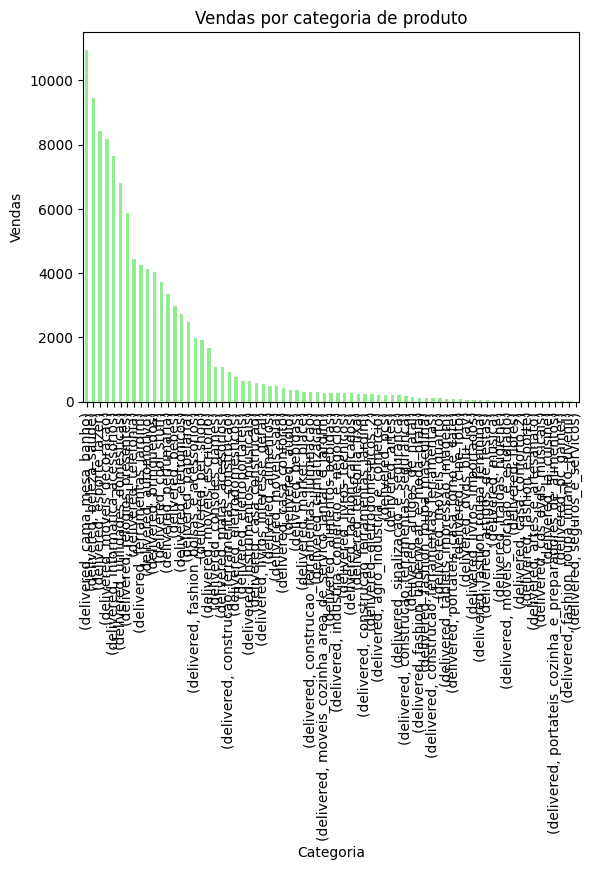

In [68]:
vendas_por_categoria = df_olist.groupby('order_status')['product_category_name'].value_counts()
vendas_por_categoria.plot(kind='bar', color='lightgreen')
plt.xlabel('Categoria')
plt.ylabel('Vendas')
plt.title('Vendas por categoria de produto')

2. Qual a média de fotos por categoria de produto? 

Text(0.5, 1.0, 'Média de fotos por categoria de produto')

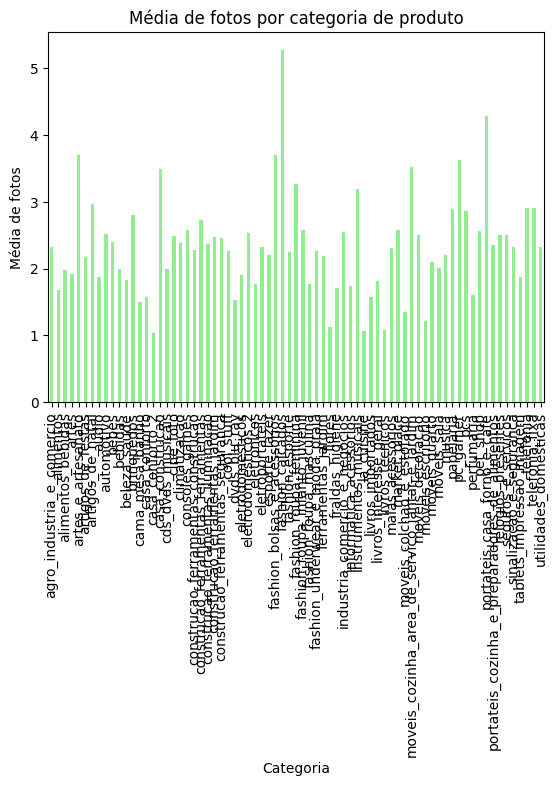

In [69]:
fotos_por_categoria = df_olist.groupby('product_category_name')['product_photos_qty'].mean()
fotos_por_categoria.plot(kind='bar', color='lightgreen') 
plt.xlabel('Categoria')
plt.ylabel('Média de fotos')
plt.title('Média de fotos por categoria de produto')

Qual a categoria de produtos com o maior faturamento? 

Text(0.5, 1.0, 'Faturamento por categoria de produto')

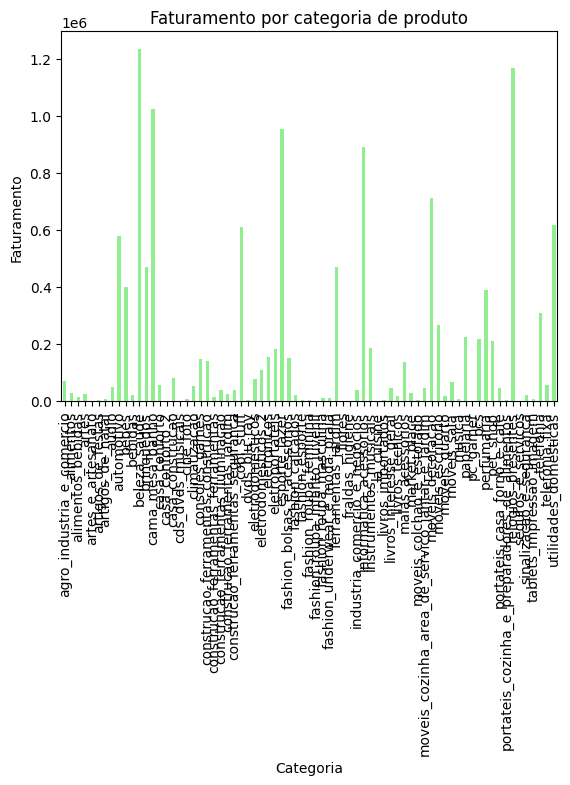

In [70]:
faturamento_por_categoria = df_olist.groupby('product_category_name')['price'].sum()
faturamento_por_categoria.plot(kind='bar', color='lightgreen') 
plt.xlabel('Categoria')
plt.ylabel('Faturamento')
plt.title('Faturamento por categoria de produto')